<a href="https://colab.research.google.com/github/nguyetvo/Covid-2019/blob/master/Prediction_Covid_19_WorldWide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19 cases World Wide Analysis 
Data Source: https://github.com/CSSEGISandData/COVID-19

In [1]:
!pip install geopandas

In [0]:
from datetime import timedelta, date, datetime
#import datetime as dt
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline


# Read data 
Data source: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)

In [0]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2020, 1, 22)
end_dt = date(2020, 4, 16)
dates = []
for dt in daterange(start_dt, end_dt):
    dates.append(dt.strftime("%m-%d-%Y"))


In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
df1 = pd.read_csv(url+dates[0]+'.csv')
for dt in tqdm(dates):
  #print(dt)
  df2 = pd.read_csv(url+dt+'.csv')
  if datetime.strptime(dt,"%m-%d-%Y")  > datetime.strptime("03-21-2020", "%m-%d-%Y"): 
    print(dt)
    df2.rename(columns={'Province_State': 'Province/State', 'Country_Region':'Country/Region','Last_Update': 'Last Update'}, inplace = True)
    df2.drop(['FIPS'], axis=1, inplace=True)
    df2.drop(['Admin2'], axis=1, inplace=True)
    df2.drop(['Active'], axis=1, inplace=True)
    df2.drop(['Combined_Key'], axis=1, inplace=True)
  df1 = pd.merge(df1, df2, how='outer' )

 71%|███████   | 61/86 [00:03<00:01, 14.78it/s]

03-22-2020
03-23-2020


 73%|███████▎  | 63/86 [00:03<00:01, 11.94it/s]

03-24-2020
03-25-2020


 76%|███████▌  | 65/86 [00:03<00:02, 10.28it/s]

03-26-2020
03-27-2020


 78%|███████▊  | 67/86 [00:03<00:02,  9.22it/s]

03-28-2020
03-29-2020


 80%|████████  | 69/86 [00:04<00:02,  8.36it/s]

03-30-2020
03-31-2020


 83%|████████▎ | 71/86 [00:04<00:02,  7.43it/s]

04-01-2020
04-02-2020


 85%|████████▍ | 73/86 [00:04<00:01,  6.90it/s]

04-03-2020
04-04-2020


 87%|████████▋ | 75/86 [00:05<00:01,  6.34it/s]

04-05-2020
04-06-2020


 90%|████████▉ | 77/86 [00:05<00:01,  6.12it/s]

04-07-2020
04-08-2020


 92%|█████████▏| 79/86 [00:05<00:01,  5.90it/s]

04-09-2020
04-10-2020


 94%|█████████▍| 81/86 [00:06<00:00,  5.63it/s]

04-11-2020
04-12-2020


 97%|█████████▋| 83/86 [00:06<00:00,  5.44it/s]

04-13-2020
04-14-2020


 99%|█████████▉| 85/86 [00:07<00:00,  5.19it/s]

04-15-2020


100%|██████████| 86/86 [00:07<00:00, 11.90it/s]

04-16-2020


In [0]:
df1.drop(['Province/State'], axis=1, inplace=True)
df1['Last Update']= pd.to_datetime(df1['Last Update']) 
df1['Last Update'] = df1['Last Update'].dt.date
df1.fillna(0, inplace = True)

In [0]:
dict_country = {'Cote d\'Ivoire': 'Côte d\'Ivoire', 'Martinique':'France', 'Hong Kong':'China',
                'North Korea':'Korea, Democratic People\'s Republic of','Republic of Korea':'South Korea',
                'Korea, South': 'South Korea','US':'United States of America','UK':'United Kingdom',
                'Mainland China':'China','Iran (Islamic Republic of)':'Iran', 'Czech Republic': 'Czechia',
                'Hong Kong SAR': 'Hong Kong','Bosnia and Herzegovina': 'Bosnia and Herz.','Republic of Ireland':'Ireland',
                ' Azerbaijan':'Azerbaijan', 'Andorra':'Italy','Aruba':'Netherlands','Cayman Islands':'United Kingdom',
                'Central African Republic':'Central African Rep.','Channel Islands':'United Kingdom',
                'Congo (Brazzaville)':'Congo','Congo (Kinshasa)':'Congo','Viet Nam':'Vietnam',
                'Equatorial Guinea': 'Eq. Guinea', 'Eswatini':'eSwatini' ,'occupied Palestinian territory':'Palestine',
                'Vatican City':'Italy','The Bahamas':'Bahamas','Taiwan*':'Taiwan','Taipei and environs':'Taiwan','Holy See':'Italy',
                'Saint Martin':'St. Martin','Singapore':'China','Russian Federation':'Russia',
                'Republic of the Congo':'Congo','Republic of Moldova':'Moldova','North Macedonia':'Macedonia',
                'North Ireland':'United Kingdom','Monaco':'Others','Seychelles':'Others','Saint Vincent and the Grenadines':'Others',
                'Antigua and Barbuda':'Others','Bahrain':'Others','Cruise Ship':'Others', 'Curacao':'Others','Dominican Republic':'Dominican Rep.',
                'Faroe Islands': 'Others', 'French Guiana':'Others','Gibraltar':'Others','Guadeloupe':'Others','Guam':'Others','Ivory Coast':'Côte d\'Ivoire'}
for key, value in dict_country.items():
  df1['Country/Region'].replace([key], value,inplace=True)

In [7]:
df1.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Lat,Long_
0,China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,China,2020-01-22,14.0,0.0,0.0,0.0,0.0,0.0,0.0
2,China,2020-01-22,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,China,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83488 entries, 0 to 83487
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  83488 non-null  object 
 1   Last Update     83488 non-null  object 
 2   Confirmed       83488 non-null  float64
 3   Deaths          83488 non-null  float64
 4   Recovered       83488 non-null  float64
 5   Latitude        83488 non-null  float64
 6   Longitude       83488 non-null  float64
 7   Lat             83488 non-null  float64
 8   Long_           83488 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.4+ MB


In [9]:
df1.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Lat,Long_
0,China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,China,2020-01-22,14.0,0.0,0.0,0.0,0.0,0.0,0.0
2,China,2020-01-22,6.0,0.0,0.0,0.0,0.0,0.0,0.0
3,China,2020-01-22,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,China,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df1 = pd.pivot_table(df1, index=['Country/Region','Last Update'], aggfunc={'Confirmed':np.sum, 'Deaths':np.sum,\
                                                                           'Recovered':np.sum,'Latitude':np.max,\
                                                                           'Longitude':np.max})

In [11]:
df1.head(10)


Confirmed  Deaths  Latitude  Longitude  Recovered
Country/Region Last Update                                                   
Afghanistan    2020-02-24         1.0     0.0   33.0000      65.00        0.0
               2020-03-08         4.0     0.0   33.0000      65.00        0.0
               2020-03-10         5.0     0.0   33.0000      65.00        0.0
               2020-03-11        14.0     0.0   33.0000      65.00        0.0
               2020-03-14        11.0     0.0   33.9391      67.71        0.0
               2020-03-15        16.0     0.0   33.9391      67.71        0.0
               2020-03-16        21.0     0.0   33.9391      67.71        1.0
               2020-03-17        22.0     0.0   33.9391      67.71        1.0
               2020-03-20        24.0     0.0   33.9391      67.71        1.0
               2020-03-22        40.0     1.0    0.0000       0.00        1.0

In [0]:
def plot_percent(df_country, Country):
  ## Plotting the percentage
  plt.rcParams.update({'font.size': 22})
  plt.rcParams["figure.figsize"] = [16,10]
  plt.rc('xtick',labelsize=14, )
  plt.rc('ytick',labelsize=14)
  ax = df_country.plot('Last Update', ['deceased_percent', 'recovered_percent'])
  #ax = df_country.plot('Last Update', 'deceased_percent')
  ax.set_ylabel("Percentage", fontname="Arial", fontsize=18)
  ax.set_xlabel("Date", fontname="Arial", fontsize=18)
  ax.legend(loc=0, prop={'size': 20})
  ax.set_title("Percentage deceased, recovered and severe in "+ Country, fontsize=20)
  plt.xticks(rotation=45)

In [0]:
def plot_total(df1, Country, graph='Active_recovered', bar=False):
  df_country = df1.loc[Country]
  df_country.reset_index(inplace=True)
  #df_country.drop(df_country.tail(1).index,inplace=True)
  
  ## Plotting the percentage
  plt.rcParams.update({'font.size': 22})
  plt.rcParams["figure.figsize"] = [16,10]
  plt.rc('xtick',labelsize=14, )
  plt.rc('ytick',labelsize=14)
  
  if graph == 'Active_recovered':
    df_country['Active'] = (df_country['Confirmed']- df_country['Deaths']-df_country['Recovered'])
    if bar:
      ax = df_country.plot.bar(x='Last Update', y=['Active', 'Recovered', 'Deaths'],stacked=True)
    else:
      ax = df_country.plot('Last Update', ['Active', 'Recovered', 'Deaths'])
    ax.set_ylabel("Number", fontname="Arial", fontsize=18)
    ax.set_xlabel("Date", fontname="Arial", fontsize=18)
    ax.legend(loc=0, prop={'size': 20})
    ax.set_title("Active, Recovered and Deaths in  "+ Country, fontsize=20)
    
  
  if graph == 'daily_increase':
    df_country['daily_increase'] = df_country['Confirmed'] - df_country['Confirmed'].shift(1)
    ax = df_country.plot.bar(x='Last Update', y=['daily_increase'])
    ax.set_ylabel("Daily increase", fontname="Arial", fontsize=18)
    ax.set_xlabel("Date", fontname="Arial", fontsize=18)
    ax.legend(loc=0, prop={'size': 20})
    ax.set_title("Daily Increase in "+ Country, fontsize=20)
    

  if graph == 'percent':
    df_country['deceased_percent'] = (df_country['Deaths']/ df_country['Confirmed'])*100
    df_country['recovered_percent'] = (df_country['Recovered']/ df_country['Confirmed'])*100
    ax = df_country.plot('Last Update', ['deceased_percent', 'recovered_percent'])
     #ax = df_country.plot('Last Update', 'deceased_percent')
    ax.set_ylabel("Percentage", fontname="Arial", fontsize=18)
    ax.set_xlabel("Date", fontname="Arial", fontsize=18)
    ax.legend(loc=0, prop={'size': 20})
    ax.set_title("Percentage deceased, recovered and severe in "+ Country, fontsize=20)
  
  plt.xticks(rotation=45)


## Summarizing data from all countries.


In [0]:
from scipy.optimize import curve_fit
def prediction_country_summary(Country, df1, plot= False):
  """
  function summarizes data for each country 
  """
  df_final = df1.copy()
  df_country = df_final.loc[Country]
  df_country.reset_index(inplace=True)
    
  # Adding percentage of Deceased and ICU 

  df_country['deceased_percent'] = (df_country['Deaths']/ df_country['Confirmed'])*100
  df_country['recovered_percent'] = (df_country['Recovered']/ df_country['Confirmed'])*100
  df_country['active'] = (df_country['Confirmed']- df_country['Deaths']-df_country['Recovered'])
  
  
  xdata=np.array(range(df_country.shape[0]))
  ydata=df_country['Confirmed'].values

  def func(x,a,b):
    return a*2**(x/b)
    
  try:
    popt, pcov = curve_fit(func,xdata=xdata,ydata=ydata)
    perr = np.sqrt(np.diag(pcov))
    resid = np.linalg.norm(ydata-func(xdata, *popt))
  except:
    popt = np.array([0,0])
  #print("For {} the coefficients of function is \n {} * 2 ** (t/{}) \n The covariance is:\n {} \n and the error is {}".format(Country,popt[0], popt[1], pcov, resid))

  if plot:
    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    yfit = popt[0]*2**(xdata/popt[1])
    perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in '+ Country,fontsize=20)
    #ax1.set_yscale('log')
    ax1.plot(df_country['Confirmed'],'--o',ms=10,label='Real Data')
    ax1.plot(xdata,yfit,'-',label=f'Exponential fit {round(popt[0],1)}*2^(t/{round(popt[1],1)}), \n doubling time = {round(popt[1],1)} days')
    ax1.legend(fontsize=15)
    plt.show()
  return [Country, df_country['Last Update'][0],df_country['Confirmed'].iloc[-1], df_country['active'].iloc[-1],\
          df_country['deceased_percent'].iloc[-1], df_country['recovered_percent'].iloc[-1],popt[0],popt[1], \
          df_country['Latitude'].iloc[-1],df_country['Longitude'].iloc[-1]] 



In [0]:
Countries = set(df1.reset_index()['Country/Region'].tolist())  # to be used if you want to do it for all countries
#Countries = ["China", "Iran", "South Korea", "Germany", "India", "Spain", "Italy", "United States of America", "United Kingdom", "Vietnam"]

In [16]:
List = []
for Country in tqdm(Countries):
  List.append(prediction_country_summary(Country, df1))

  0%|          | 0/194 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
100%|██████████| 194/194 [00:01<00:00, 140.20it/s]


In [17]:
df_summary = pd.DataFrame(List, columns = ["Country", "First_Case", "Total_Confirmed_Today", "Active","Deceased_Percent",\
                                          "Recovered_Percent","First_Coeff", "Doubling_time_in_days","Latitude", "Longitude"])
df_summary.head(10)

,Country,First_Case,Total_Confirmed_Today,Active,Deceased_Percent,Recovered_Percent,First_Coeff,Doubling_time_in_days,Latitude,Longitude
0,St. Martin,2020-03-09,2.0,2.0,0.000000,0.000000,2.000000,1.207234e+08,18.0708,-63.0501
1,Sudan,2020-03-11,32.0,23.0,15.625000,12.500000,1.745941,6.487909e+00,0.0000,0.0000
2,Hungary,2020-03-04,1652.0,1311.0,8.595642,12.046005,57.230812,7.799074e+00,0.0000,0.0000
3,The Gambia,2020-03-17,0.0,0.0,NaN,NaN,0.500000,2.290727e+07,13.4667,-16.6000
4,Jordan,2020-03-03,402.0,136.0,1.741294,64.427861,88.591495,1.380252e+01,0.0000,0.0000
5,Bolivia,2020-03-11,441.0,398.0,6.575964,3.174603,22.176048,7.150316e+00,0.0000,0.0000
6,Burma,2020-03-27,85.0,79.0,4.705882,2.352941,5.693250,5.207797e+00,0.0000,0.0000
7,Saudi Arabia,2020-03-02,6380.0,5307.0,1.300940,15.517241,179.262040,7.339339e+00,0.0000,0.0000
8,South Africa,2020-03-05,2605.0,1654.0,1.842610,34.664107,250.008556,1.075005e+01,0.0000,0.0000
9,Portugal,2020-03-02,18841.0,17719.0,3.338464,2.616634,845.278059,8.955230e+00,0.0000,0.0000


In [18]:
df_summary

,Country,First_Case,Total_Confirmed_Today,Active,Deceased_Percent,Recovered_Percent,First_Coeff,Doubling_time_in_days,Latitude,Longitude
0,St. Martin,2020-03-09,2.0,2.0,0.000000,0.000000,2.000000e+00,1.207234e+08,18.0708,-63.0501
1,Sudan,2020-03-11,32.0,23.0,15.625000,12.500000,1.745941e+00,6.487909e+00,0.0000,0.0000
2,Hungary,2020-03-04,1652.0,1311.0,8.595642,12.046005,5.723081e+01,7.799074e+00,0.0000,0.0000
3,The Gambia,2020-03-17,0.0,0.0,NaN,NaN,5.000000e-01,2.290727e+07,13.4667,-16.6000
4,Jordan,2020-03-03,402.0,136.0,1.741294,64.427861,8.859150e+01,1.380252e+01,0.0000,0.0000
5,Bolivia,2020-03-11,441.0,398.0,6.575964,3.174603,2.217605e+01,7.150316e+00,0.0000,0.0000
6,Burma,2020-03-27,85.0,79.0,4.705882,2.352941,5.693250e+00,5.207797e+00,0.0000,0.0000
7,Saudi Arabia,2020-03-02,6380.0,5307.0,1.300940,15.517241,1.792620e+02,7.339339e+00,0.0000,0.0000
8,South Africa,2020-03-05,2605.0,1654.0,1.842610,34.664107,2.500086e+02,1.075005e+01,0.0000,0.0000
9,Portugal,2020-03-02,18841.0,17719.0,3.338464,2.616634,8.452781e+02,8.955230e+00,0.0000,0.0000


Let us see how different countries are fairing in terms of increase in infected.

In [0]:
Countries_1 = ["China", "Iran", "South Korea", "Germany", "India", "Spain", "Italy", "United States of America", "United Kingdom", "Vietnam"]

In [20]:
List = []
for Country in tqdm(Countries_1):
  List.append(prediction_country_summary(Country, df1))

100%|██████████| 10/10 [00:00<00:00, 101.67it/s]


In [21]:
df_summary = pd.DataFrame(List, columns = ["Country", "First_Case", "Total_Confirmed_Today", "Active","Deceased_Percent",\
                                          "Recovered_Percent","First_Coeff", "Doubling_time_in_days","Latitude", "Longitude"])
df_summary.head(10)

,Country,First_Case,Total_Confirmed_Today,Active,Deceased_Percent,Recovered_Percent,First_Coeff,Doubling_time_in_days,Latitude,Longitude
0,China,2020-01-22,78998.0,5293.0,4.164662,89.135168,4.022809e-19,1.000000,0.0,0.0
1,Iran,2020-02-19,77995.0,20897.0,6.242708,66.964549,4.223989e+03,12.633895,0.0,0.0
2,South Korea,2020-01-22,10613.0,2627.0,2.157731,73.089607,1.504102e+03,24.726179,0.0,0.0
3,Germany,2020-01-28,137698.0,56646.0,2.942672,55.919476,2.683365e+03,10.573943,0.0,0.0
4,India,2020-01-30,13430.0,11214.0,3.335815,13.164557,3.502908e+01,5.638825,0.0,0.0
5,Spain,2020-02-01,184948.0,90836.0,10.443476,40.442178,6.625127e+03,10.495652,0.0,0.0
6,Italy,2020-01-31,169622.0,107084.0,13.089694,23.779345,1.005622e+04,12.956413,0.0,0.0
7,United States of America,2020-01-22,667801.0,580182.0,4.929013,8.191512,1.427704e+03,7.729003,0.0,0.0
8,United Kingdom,2020-01-31,104145.0,90011.0,13.211388,0.360075,6.747932e+02,7.394332,0.0,0.0
9,Vietnam,2020-01-23,268.0,91.0,0.000000,66.044776,2.448884e+01,14.779784,0.0,0.0


China 4.0228089987902634e-19 0.9999999968668725
Iran 4223.989244998574 12.633895493745046
South Korea 1504.101514629312 24.72617850820722
Germany 2683.364989182252 10.573942902501694
India 35.02907719131018 5.638824786572373
Spain 6625.127054871717 10.49565161812856
Italy 10056.218939091119 12.95641320129903
United States of America 1427.703545855192 7.729002985594295
United Kingdom 674.79322363237 7.394331826134674
Vietnam 24.488841961831554 14.779784230198782


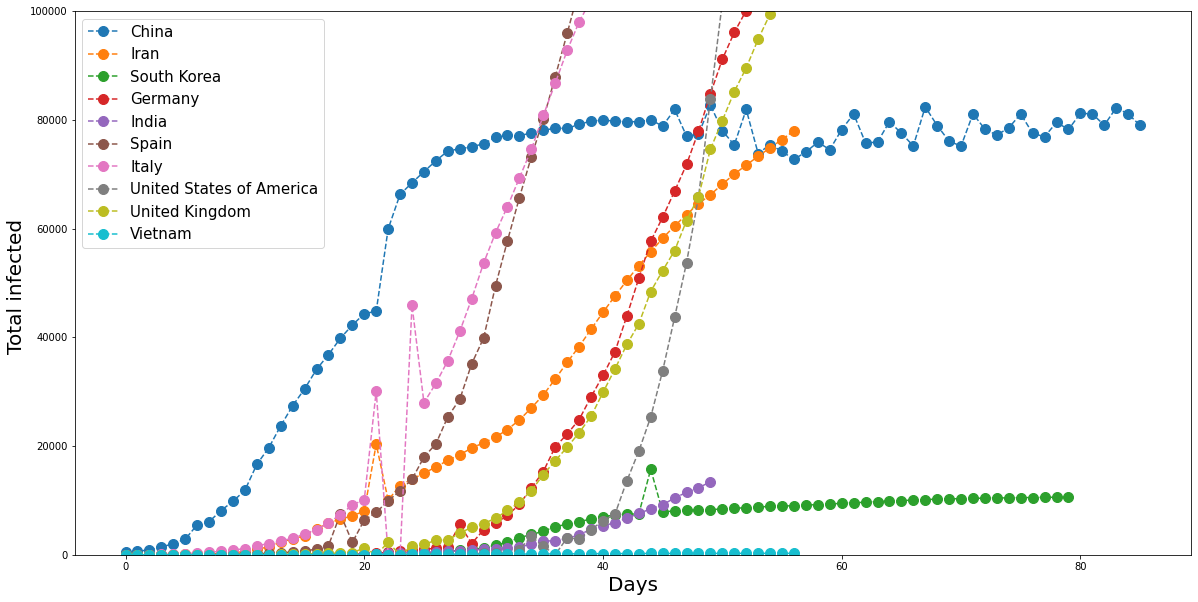

In [22]:
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(20,10))
ax1.set_ylabel('Total infected ',fontsize=20)
ax1.set_xlabel('Days',fontsize=20)
ax1.set_ylim(0,100000)
for loc in range(len(Countries_1)):
  Country = df_summary.loc[loc].Country
  df_country = df1.loc[Country]
  df_country.reset_index(inplace=True)
  orig = df_country['Confirmed'].tolist()
  coeff1, coeff2 = df_summary.loc[loc].First_Coeff, df_summary.loc[loc].Doubling_time_in_days
  print(Country, coeff1, coeff2)
  predictions = []
  for i in range(48):
    yfit = coeff1*2**(i/coeff2)
    predictions.append(yfit)
  ax1.plot(orig,'--o',ms=10,label=Country)
  #ax1.plot(yfit,'--',label=f'Exponential fit')
  #plt.plot(predictions, label='predictions')
  ax1.legend(fontsize=15)

And now the bad but necessary task of prediction--change `loc` to see a different country. 

India 35.02907719131018 5.638824786572373


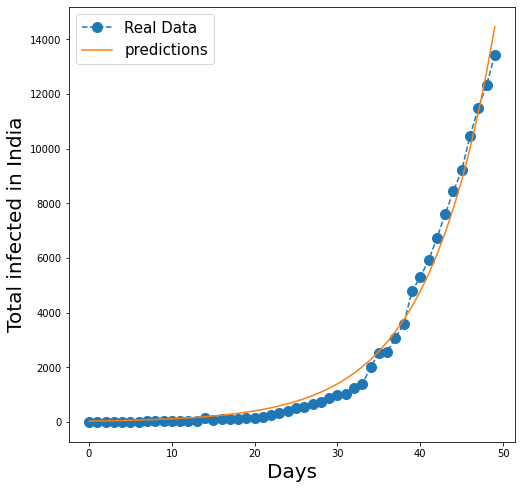

In [23]:
loc = 4
Country = df_summary.loc[loc].Country
df_country = df1.loc[Country]
df_country.reset_index(inplace=True)
orig = df_country['Confirmed'].tolist()
coeff1, coeff2 = df_summary.loc[loc].First_Coeff, df_summary.loc[loc].Doubling_time_in_days
print(Country, coeff1, coeff2)
predictions = []
for i in range(50):
  yfit = coeff1*2**(i/coeff2)
  predictions.append(yfit)

fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
ax1.set_ylabel('Total infected in '+Country,fontsize=20)
ax1.set_xlabel('Days',fontsize=20)
ax1.plot(orig,'--o',ms=10,label='Real Data')
#ax1.plot(yfit,'-',label=f'Exponential fit')
plt.plot(predictions, label='predictions')
ax1.legend(fontsize=15)

### Compare doubling time

Investigating how the doubling time is changing gives an idea how good or bad a country is doing in controlling the virus spread--
* A large doubling time is good.
* A constant doubling time - means the measures being taken are effective in controlling the spread
* An increasing doubling time means - the battle is on winning side
* A decreasing doubling time-- well danger zone ahead.  Do something fast

In [0]:
from scipy.optimize import curve_fit
def prediction_country2(Country, df1, plot=True,predict=False):
  df_final = df1.copy()
  df_country = df_final.loc[Country]
  df_country.reset_index(inplace=True)
    
  x=np.array(range(df_country.shape[0]))
  y=df_country['Confirmed'].values
  #print(len(x))

 
  def func(x,a,b):
    return a*2**(x/b)
  
  list_coeff = [Country]  
  for i in range(10, len(x), 1):
    xdata = x[:i]
    ydata = y[:i]

    try:
      popt, pcov = curve_fit(func,xdata=xdata,ydata=ydata)
    except:
      popt = np.array([0,0])
    list_coeff.append(popt[1])
  if plot:
    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    yfit = popt[0]*2**(xdata/popt[1])
    perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in '+ Country,fontsize=20)
    #ax1.set_yscale('log')
    ax1.plot(df_country['Confirmed'],'--o',ms=10,label='Real Data')
    ax1.plot(xdata,yfit,'-',label=f'Exponential fit {round(popt[0],1)}*2^(t/{round(popt[1],1)}), \n doubling time = {round(popt[1],1)} days')
    ax1.legend(fontsize=15)
    plt.show()
  if predict:
    x_new = [range(60)]
    predict_result = np.asarray([func(i, popt[0],popt[1]) for i in x_new])
    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    yfit = predict_result
    #perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in '+ Country,fontsize=20)
    #ax1.set_yscale('log')
    ax1.plot(df_country['Confirmed'],'--o',ms=10,label='Real Data')
    ax1.plot(yfit,'-',label=f'Exponential fit')
    ax1.legend(fontsize=15)
    plt.show()

  return list_coeff


In [25]:
Countries = ["China", "Iran", "South Korea", "Germany", "India", "Spain", "Italy", "United States of America", "United Kingdom", "Vietnam"]
List = []
for Country in tqdm(Countries):
  coeff = prediction_country2(Country, df1,plot=False)
  List.append(coeff)

100%|██████████| 10/10 [00:01<00:00,  9.84it/s]


In [0]:
df_combines = pd.DataFrame(List).T

In [0]:
df_combines.columns = df_combines.iloc[0]
df_combines.drop(df_combines.index[0], inplace=True)

In [28]:
df_combines

,China,Iran,South Korea,Germany,India,Spain,Italy,United States of America,United Kingdom,Vietnam
1,2.37534,1.46859,2.55368,4.24843,1.85762,1.48148,1.87864,4.96757,3.10638,0.539013
2,2.62386,1.52231,2.49846,4.86703,2.36829,1.67929,2.08684,2.58907,2.74167,2.40501
3,2.59604,1.47737,2.58495,5.62366,2.78295,1.86263,2.04362,4.94625,2.90559,2.81464
4,2.74836,1.51846,2.96266,6.47299,3.19242,2.18377,2.24987,8.94521,2.9572,2.9169
5,2.91505,1.54193,3.22009,7.1941,3.32391,2.12714,2.4616,12.8004,2.44257,3.25181
6,3.13633,1.81276,3.37612,6.31375,1.84979,2.25684,2.64228,23.3029,2.26426,3.65485
7,3.42334,2.12189,3.73351,4.38156,3.12145,2.31254,2.77371,33.1132,2.14719,4.0805
8,3.71474,2.25482,4.1678,3.99031,3.52501,2.06932,2.9302,0.351909,2.25832,4.62079
9,4.05222,2.44243,4.5711,2.94634,3.88353,1.81643,2.99397,4.59031,2.32871,5.223
10,4.39756,2.73979,5.01976,2.03401,4.28641,0.556929,3.03018,1.78977,2.55562,5.64741


In [29]:
df_combines["Vietnam"].rolling(10).mean()

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10     3.515392
11     3.964535
12     4.218177
13     4.149752
14     4.239021
15     4.341768
16     4.448250
17     4.549060
18     4.629064
19     4.670348
20     4.682786
21     4.775815
22     4.906147
23     5.322512
24     5.579445
25     5.799823
26     5.994518
27     6.169367
28     6.330425
29     6.490239
30     6.654523
31     6.816213
32     6.970923
33     7.148357
34     7.341579
35     7.555442
36     7.787378
37     8.043887
38     8.324090
39     8.628243
40     8.960729
41     9.323605
42     9.713331
43    10.125596
44    10.563382
45    11.020206
46    11.492321
47    11.975882
48          NaN
49          NaN
50          NaN
51          NaN
52          NaN
53          NaN
54          NaN
55          NaN
56          NaN
57          NaN
58          NaN
59          NaN
60          NaN
61          NaN
62          NaN
63      

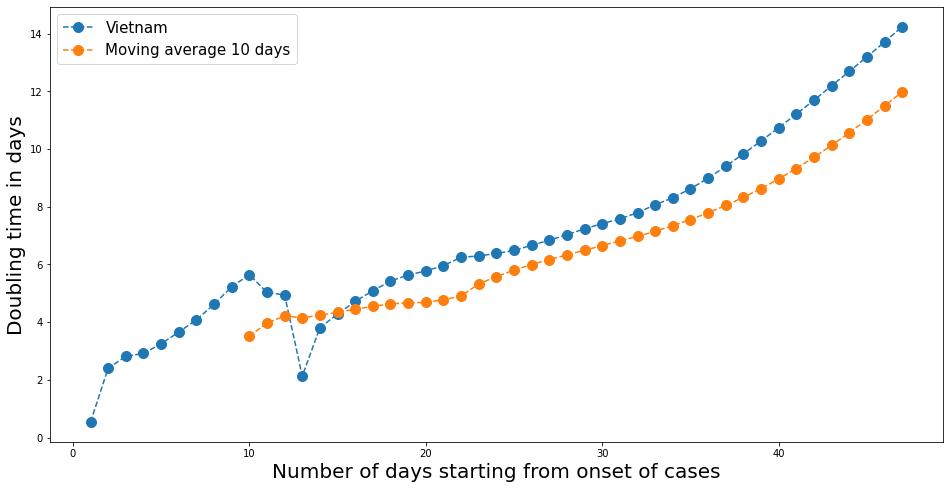

In [30]:
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel('Doubling time in days',fontsize=20)
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)
ax1.plot(df_combines['Vietnam'],'--o',ms=10,label='Vietnam')
ax1.plot(df_combines["Vietnam"].rolling(10).mean(),'--o',ms=10,label='Moving average 10 days' )
ax1.legend(fontsize=15)
#plt.show()

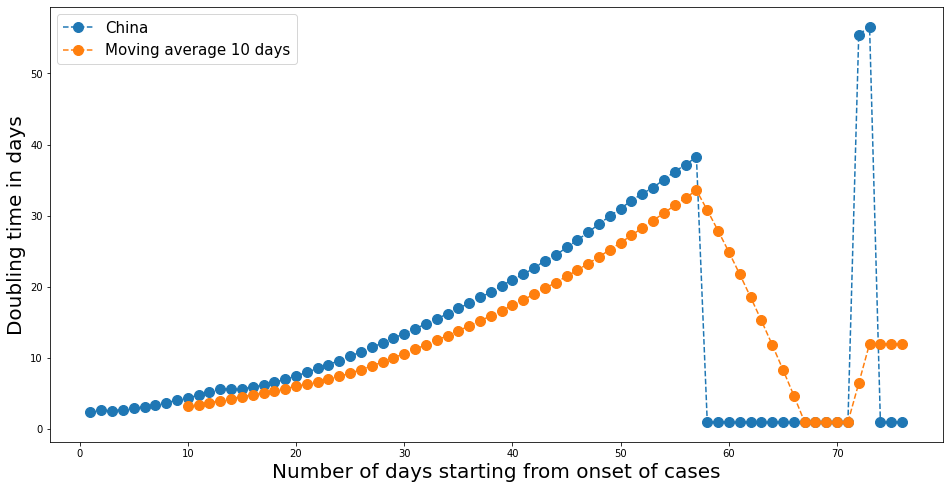

In [31]:
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel('Doubling time in days',fontsize=20)
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)
ax1.plot(df_combines['China'],'--o',ms=10,label='China')
ax1.plot(df_combines["China"].rolling(10).mean(),'--o',ms=10,label='Moving average 10 days' )
ax1.legend(fontsize=15)

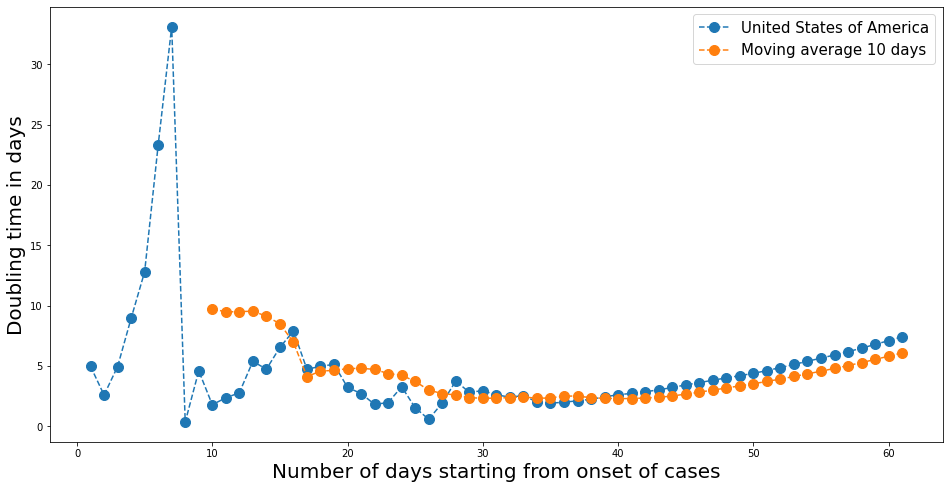

In [32]:
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel('Doubling time in days',fontsize=20)
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)
ax1.plot(df_combines['United States of America'],'--o',ms=10,label='United States of America')
ax1.plot(df_combines["United States of America"].rolling(10).mean(),'--o',ms=10,label='Moving average 10 days' )
ax1.legend(fontsize=15)

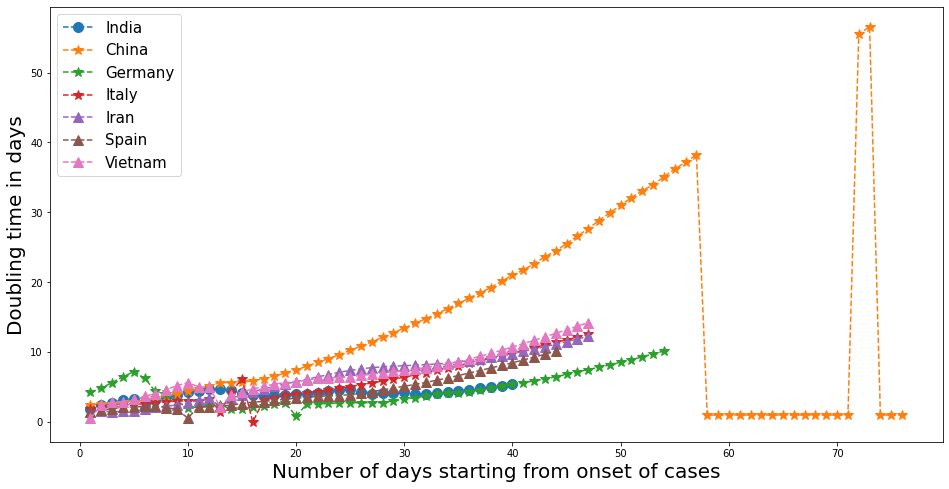

In [33]:
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel('Doubling time in days',fontsize=20)
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)
ax1.plot(df_combines['India'],'--o',ms=10,label='India')
ax1.plot(df_combines['China'],'--*',ms=10,label='China')
ax1.plot(df_combines['Germany'],'--*',ms=10,label='Germany')
ax1.plot(df_combines['Italy'],'--*',ms=10,label='Italy')
ax1.plot(df_combines['Iran'],'--^',ms=10,label='Iran')
ax1.plot(df_combines['Spain'],'--^',ms=10,label='Spain')
ax1.plot(df_combines['Vietnam'],'--^',ms=10,label='Vietnam')
ax1.legend(fontsize=15)
#plt.show()

Let us zoom the graph a little

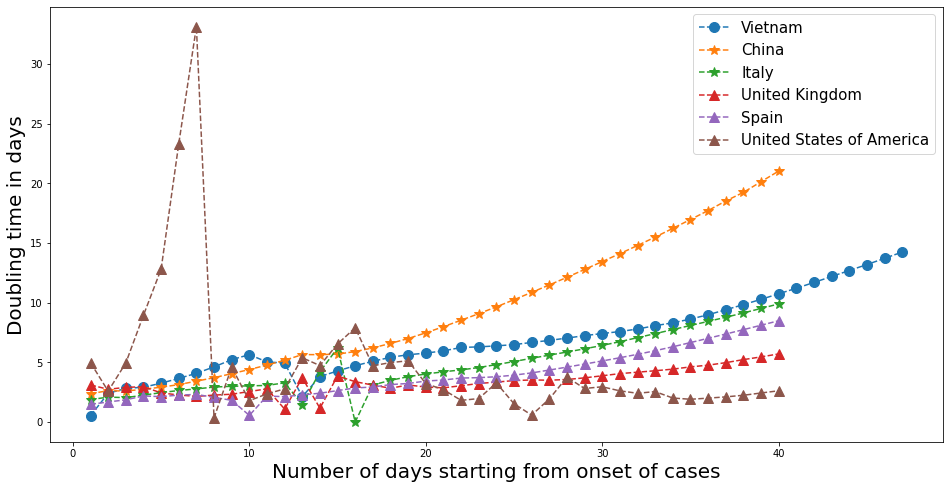

In [34]:
num = 40
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel('Doubling time in days',fontsize=20)
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)
ax1.plot(df_combines['Vietnam'],'--o',ms=10,label='Vietnam')
ax1.plot(df_combines['China'].iloc[:num],'--*',ms=10,label='China')
#ax1.plot(df_combines['Germany'].iloc[:num],'--*',ms=10,label='Germany')
ax1.plot(df_combines['Italy'].iloc[:num],'--*',ms=10,label='Italy')
#ax1.plot(df_combines['Iran'].iloc[:num],'--^',ms=10,label='Iran')
ax1.plot(df_combines['United Kingdom'].iloc[:num],'--^',ms=10,label='United Kingdom')
ax1.plot(df_combines['Spain'].iloc[:num],'--^',ms=10,label='Spain')
ax1.plot(df_combines['United States of America'].iloc[:num],'--^',ms=10,label='United States of America')
ax1.legend(fontsize=15)
#plt.show()

### What next? Are we moving in the right direction?

Ihis code to measure weekly and daily increase--the results shows all countries lie in a band-- and those who are winning the battle take a jump down.

*Almost like conduction band-valence band*

In [0]:
from scipy.optimize import curve_fit
def prediction_country3(Country, df1, plot=True,predict=False):
  df_final = df1.copy()
  df_country = df_final.loc[Country]
  df_country.reset_index(inplace=True)
  df_country['weekly_increase'] = (df_country['Confirmed']/ df_country['Confirmed'].shift(7) - 1) * 100
  df_country['daily_increase'] = (df_country['Confirmed'] / df_country['Confirmed'].shift(1) - 1) * 100

  
  x=np.array(range(df_country.shape[0]))
  y=df_country['Confirmed'].values
  #print(len(x))

 
  def func(x,a,b):
    return a*2**(x/b)
  
  list_coeff = np.zeros(df_country.shape[0]) #[Country]  
  for i in range(10, len(x), 1):
    xdata = x[:i]
    ydata = y[:i]

    try:
      popt, pcov = curve_fit(func,xdata=xdata,ydata=ydata)
    except:
      popt = np.array([0,0])
    list_coeff[i] = popt[1]
  if plot:
    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    yfit = popt[0]*2**(xdata/popt[1])
    perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in '+ Country,fontsize=20)
    #ax1.set_yscale('log')
    ax1.plot(df_country['Confirmed'],'--o',ms=10,label='Real Data')
    ax1.plot(xdata,yfit,'-',label=f'Exponential fit {round(popt[0],1)}*2^(t/{round(popt[1],1)}), \n doubling time = {round(popt[1],1)} days')
    ax1.legend(fontsize=15)
    plt.show()
  if predict:
    x_new = [range(60)]
    predict_result = np.asarray([func(i, popt[0],popt[1]) for i in x_new])
    fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
    perc = np.diff(ydata) / ydata[:-1]
    yfit = predict_result
    #perc_fit = np.diff(yfit) / yfit[:-1]
    ax1.set_ylabel('Total infected in '+ Country,fontsize=20)
    #ax1.set_yscale('log')
    ax1.plot(df_country['Confirmed'],'--o',ms=10,label='Real Data')
    ax1.plot(yfit,'-',label=f'Exponential fit')
    ax1.legend(fontsize=15)
    plt.show()
  list_coeff = np.asarray(list_coeff)
  df_country["Doubling_time"] = list_coeff
  df_country["Country"] = [Country  for _ in range(df_country.shape[0])]
  return df_country


In [0]:
Countries = ["China", "Iran", "South Korea", "Germany", "India", "Spain", "Italy", "Vietnam"]
#Countries = set(df1.reset_index()['Country/Region'].tolist())

100%|██████████| 8/8 [00:01<00:00,  6.83it/s]


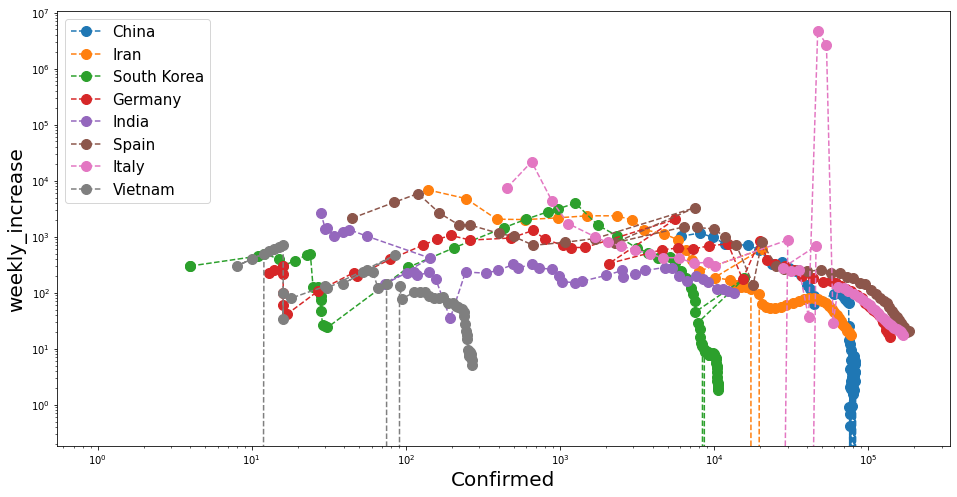

In [37]:
dff = pd.DataFrame(columns=['Country', "Doubling_time"])
Column = "weekly_increase"
fig,(ax1) = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
ax1.set_ylabel(Column,fontsize=20)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Number of days starting from onset of cases',fontsize=20)

for Country in tqdm(Countries):
  dff2 = prediction_country3(Country, df1,plot=False)
  dff2.plot("Confirmed", "weekly_increase", ls='--', marker='o', ax=ax1, ms=10,label=Country)

  dff = pd.merge(dff,dff2, how='outer')
ax1.legend(fontsize=15)

### And now view the data on world map

In [38]:
world_path = gpd.datasets.get_path('naturalearth_lowres')
World = gpd.read_file(world_path)
World.columns = ['pop_est', 'continent', 'Country', 'iso_a3', 'gdp_md_est', 'geometry']
print(len(World['Country']))
World = pd.merge(World, df_summary, on='Country',how='left')
World["Total_per_pop"] = World['Total_Confirmed_Today']/World['pop_est']*100
World.fillna(0,inplace=True)

177


Text(0.5, 1.0, 'Total number of Covid confirmed per population as on 04-16-2020')

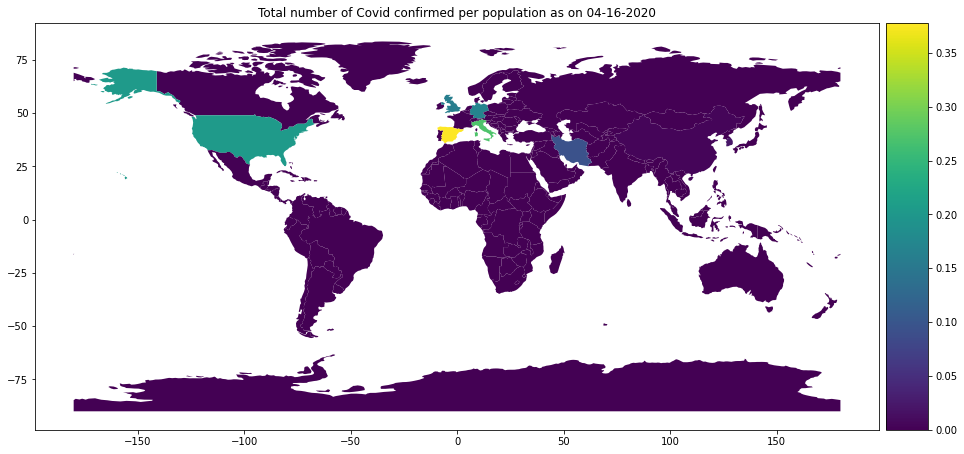

In [39]:
title = "Total_per_pop"
description = "Covid 19 cases world wide"
from mpl_toolkits.axes_grid1 import make_axes_locatable
#World = World[(World.Total_Confirmed_Today>10) & (World.Doubling_time_in_days < 30) & (World.Doubling_time_in_days > 0)]
fig, ax = plt.subplots(1, 1, figsize=(16,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
World.plot(column =title, ax=ax,
            legend=True, cax=cax)
ax.set_title("Total number of Covid confirmed per population as on "+dates[-1])

Text(0.5, 1.0, 'Total number of Covid confirmed as on 04-16-2020')

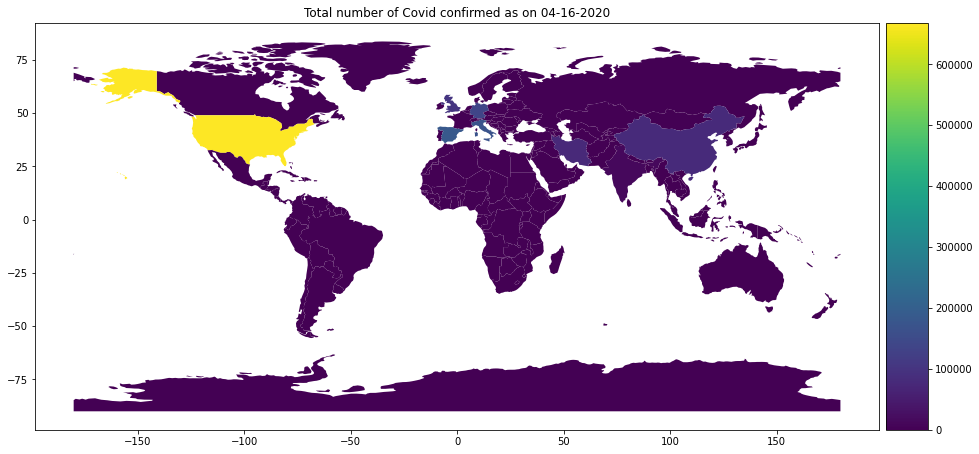

In [40]:
title = "Total_Confirmed_Today"
description = "Covid 19 cases world wide"
from mpl_toolkits.axes_grid1 import make_axes_locatable
#World = World[(World.Total_Confirmed_Today>10) & (World.Doubling_time_in_days < 30) & (World.Doubling_time_in_days > 0)]
fig, ax = plt.subplots(1, 1, figsize=(16,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
World.plot(column =title, ax=ax,
            legend=True, cax=cax)
ax.set_title("Total number of Covid confirmed as on "+dates[-1])

Text(0.5, 1.0, 'Deceased Percentage as on 04-16-2020')

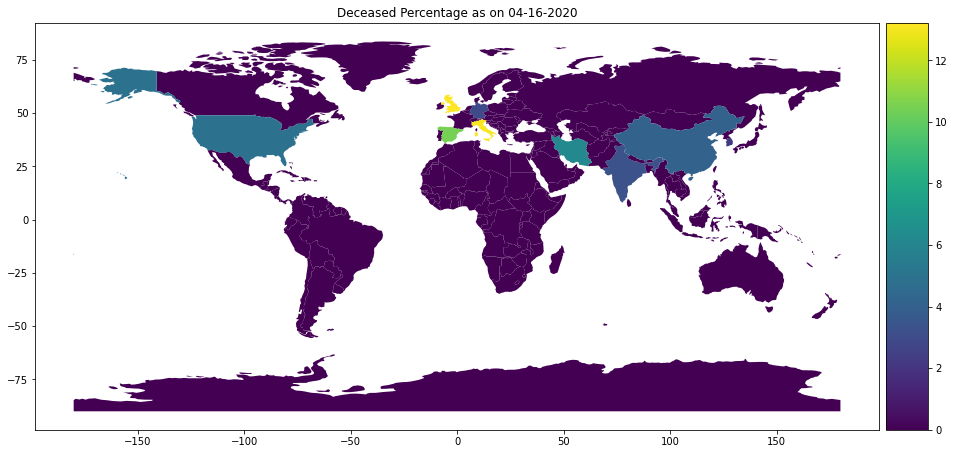

In [41]:
title = "Deceased_Percent"
description = "Covid 19 cases world wide"
from mpl_toolkits.axes_grid1 import make_axes_locatable
#World = World[(World.Total_Confirmed_Today>10) & (World.Doubling_time_in_days < 30) & (World.Doubling_time_in_days > 0)]
fig, ax = plt.subplots(1, 1, figsize=(16,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
World.plot(column =title, ax=ax,
            legend=True, cax=cax)
ax.set_title("Deceased Percentage as on "+dates[-1])

Text(0.5, 1.0, 'Recovered Percentage as on 04-16-2020')

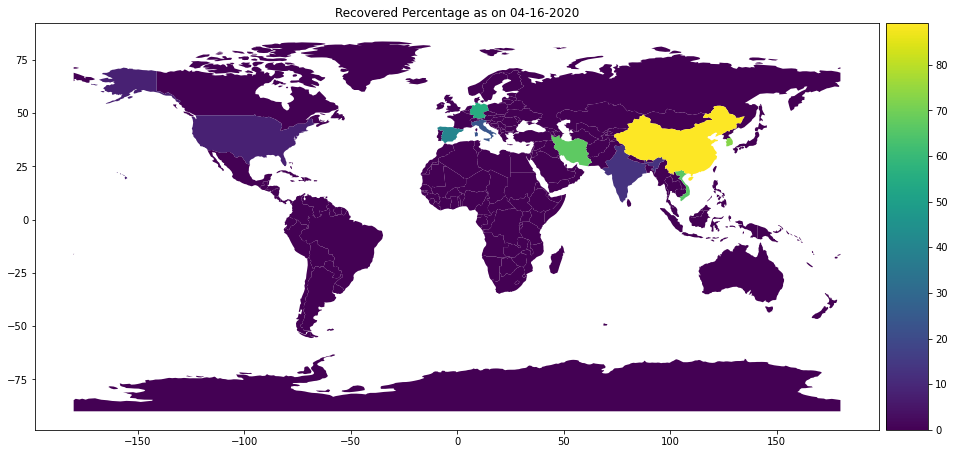

In [42]:
title = "Recovered_Percent"
description = "Covid 19 cases world wide"
from mpl_toolkits.axes_grid1 import make_axes_locatable
#World = World[(World.Total_Confirmed_Today>10) & (World.Doubling_time_in_days < 30) & (World.Doubling_time_in_days > 0)]
fig, ax = plt.subplots(1, 1, figsize=(16,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
World.plot(column =title, ax=ax,
            legend=True, cax=cax)
ax.set_title("Recovered Percentage as on "+dates[-1])

In [163]:
top = df1[df1['Last Update'] == df['Last Update'].max()]
world = top.groupby('Country/Region')['Confirmed','Recovered','Deaths'].sum().reset_index()
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country/Region,Confirmed,Recovered,Deaths
0,United States of America,667801.0,54703.0,32916.0


In [164]:
top = df1[df1['Last Update'] == df['Last Update'].min()]
world = top.groupby('Country/Region')['Confirmed','Recovered','Deaths'].sum().reset_index()
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country/Region,Confirmed,Recovered,Deaths
0,Australia,0.0,0.0,0.0
1,Bahamas,0.0,0.0,0.0
2,Brazil,0.0,0.0,0.0
3,Colombia,0.0,0.0,0.0
4,Greenland,0.0,0.0,0.0


## Let play around now a little with with different countries

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


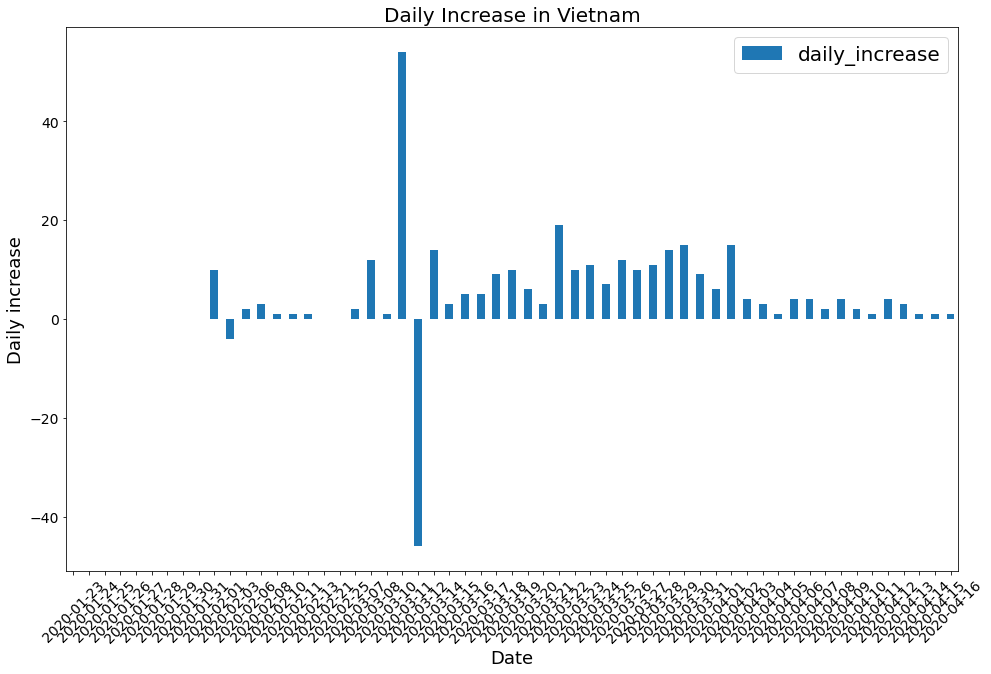

In [43]:
plot_total(df1,"Vietnam",'daily_increase')

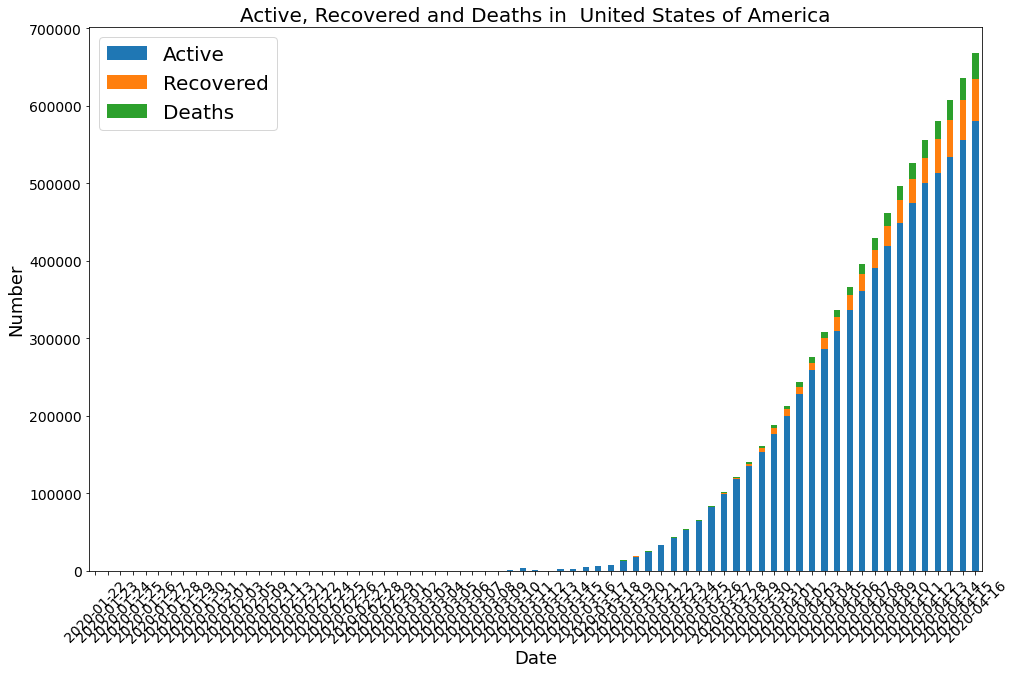

In [44]:
 plot_total(df1,"United States of America",bar=True)

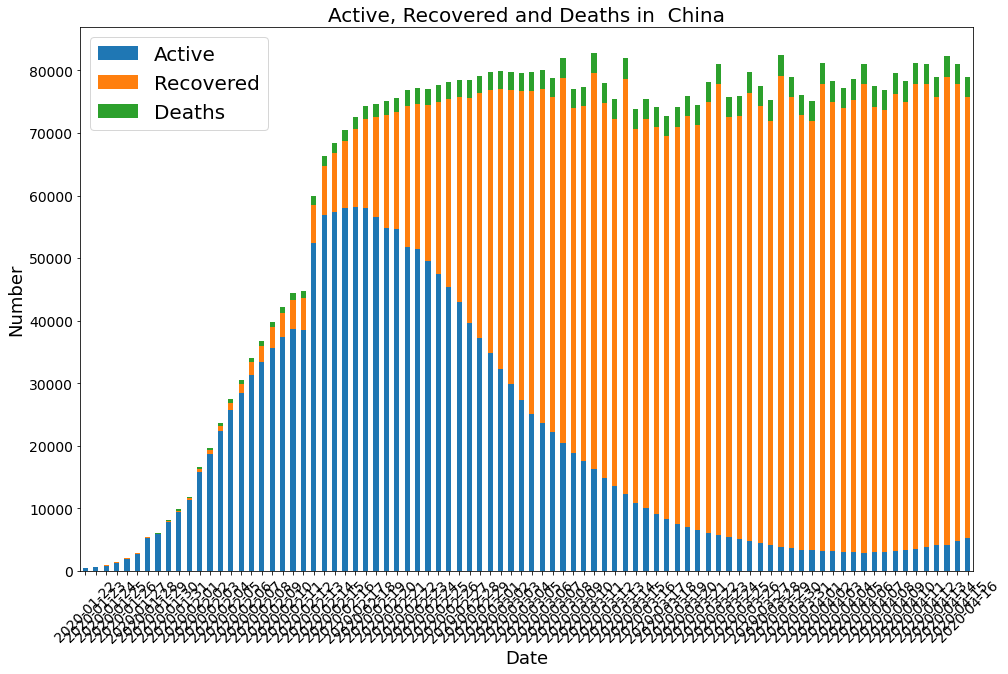

In [45]:
plot_total(df1,"China",bar=True)

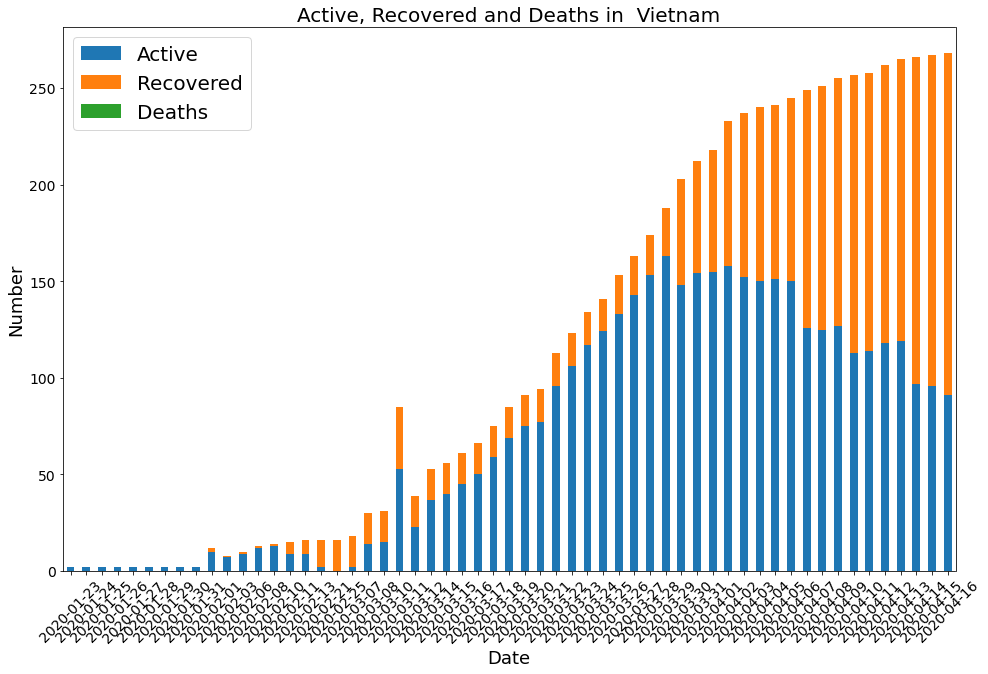

In [46]:
plot_total(df1,'Vietnam',bar=True)

## Finally SIR modelling

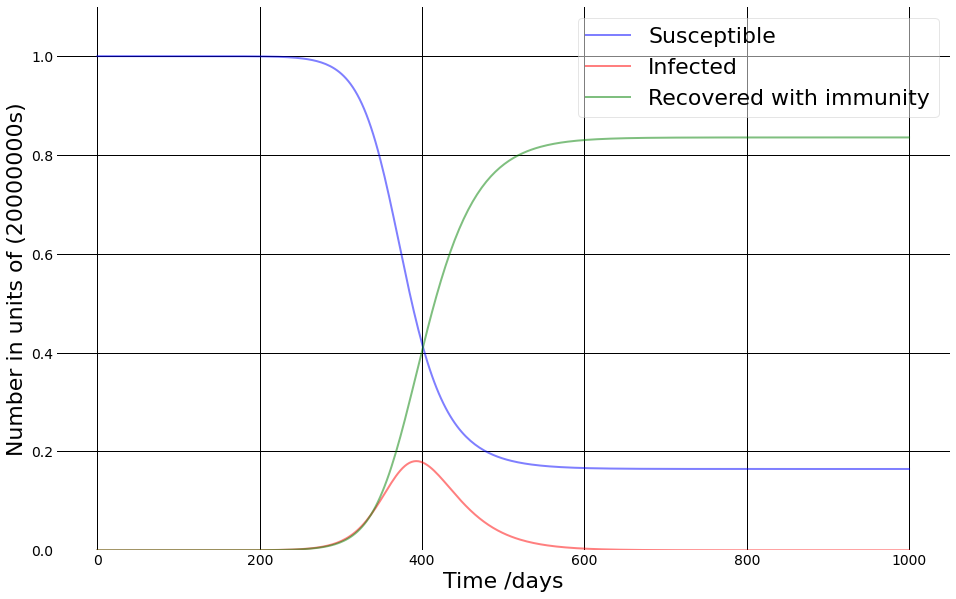

In [47]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 20000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.08, 1/27    #  https://www.worldometers.info/coronavirus/coronavirus-incubation-period/#24
# A grid of time points (in days)
t = np.linspace(0, 1000, 360)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number in units of ('+str(N)+'s)')
ax.set_ylim(0,1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='both',axis='both', c='black', lw=1, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

 # adapted code from:  https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

 # Reference: https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-contact-number

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


max hosp 0.003093097148456626


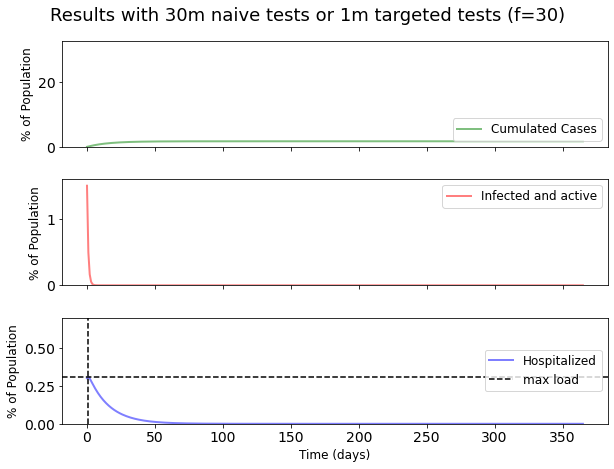

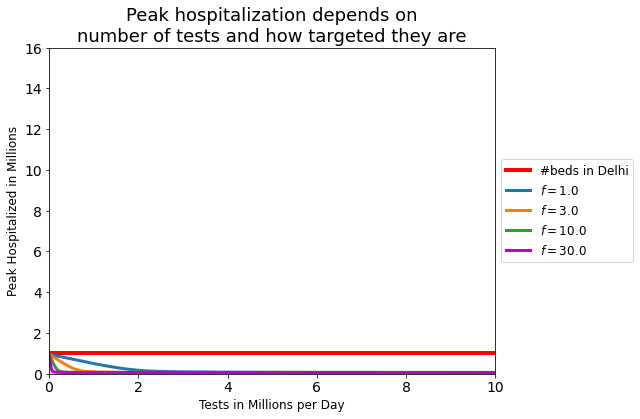

In [48]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
# Total population, N.
N = 20e6
# Initial number of infected and recovered individuals, I0 and R0.
I0, Q0, R0 = 300000, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - Q0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 1./6, 1./15 
# A grid of time points (in days)
t = np.linspace(0, 365, 365)
# The SIR model differential equations.
Ntest = 1e6
f = 30.0
posrate=0.8
hosprate = 0.20
def deriv(y, t, N, beta, gamma):
    S, I, Q, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - Ntest* f*posrate* I/N - gamma * I
    dQdt = Ntest* f*posrate* I/N - gamma * Q
    dRdt = gamma * (I+Q)
    return dSdt, dIdt, dQdt, dRdt
# Initial conditions vector
y0 = S0, I0, Q0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, Q, R = ret.T
print('max hosp {}'.format(np.max(hosprate*(I+Q)/N)))
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig, axarr = plt.subplots(3, 1, sharex=True, figsize=(9,7)) #facecolor='w')
fs = 12
# plot total cases
axarr[0].plot(t, R/N*100, 'g', alpha=0.5, lw=2, label='Cumulated Cases')
axarr[1].set_ylabel('% of Population', fontsize=fs)
axarr[0].set_ylim(0,33)
legend = axarr[0].legend(loc=4, fontsize=fs)
# plot infected
axarr[1].plot(t, I/N*100, 'r', alpha=0.5, lw=2, label='Infected and active')
#axarr[1].plot(t, Q/N*100, 'm', alpha=0.5, lw=2, label='Infected and quarantined')
axarr[0].set_ylabel('% of Population', fontsize=fs)
axarr[1].set_ylim(0,1.6)
axarr[1].legend(loc=1, fontsize=fs)
# hospitalized
axarr[2].plot(t, hosprate*(I+Q)/N*100, 'b', linestyle='-', alpha=0.5, lw=2, label='Hospitalized')
axarr[2].set_xlabel('Time (days)', fontsize=fs)
axarr[2].set_ylabel('% of Population', fontsize=fs)
axarr[2].legend(loc=1, fontsize=fs)
axarr[2].set_ylim(0,.7)
axarr[2].axvline(np.argmax(hosprate*(I+Q)/N*100), linestyle='--', color='k')
axarr[2].axhline(np.max(hosprate*(I+Q)/N*100), linestyle='--', color='k', label = 'max load')
axarr[2].legend(loc='center right', fontsize=fs)
fig.suptitle('Results with 30m naive tests or 1m targeted tests (f=30)', fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()
def maxhosp(Ntest, f=1.0):
    # Total population, N.
    N = 20e6
    # Initial number of infected and recovered individuals, I0 and R0.
    I0, Q0, R0 = 300000, 0, 0
    # Everyone else, S0, is susceptible to infection initially.
    S0 = N - I0 - R0 - Q0
    # Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
    beta, gamma = 1./6.0, 1.0/15.0 
    # A grid of time points (in days)
    t = np.linspace(0, 365, 365)
    # The SIR model differential equations.
    posrate=0.8
    hosprate = 0.20
    def deriv(y, t, N, beta, gamma):
        S, I, Q, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - Ntest* f*posrate* I/N - gamma * I
        dQdt = Ntest* f*posrate* I/N - gamma * Q
        dRdt = gamma * (I+Q)
        return dSdt, dIdt, dQdt, dRdt
    # Initial conditions vector
    y0 = S0, I0, Q0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, Q, R = ret.T
    return np.max(hosprate*(I+Q)/N)
ntests = np.logspace(3, np.log10(20e6), 300)
sims1 = [maxhosp(n, f=1.0) for n in ntests]
sims3 = [maxhosp(n, f=3.0) for n in ntests]
sims10 = [maxhosp(n, f=10.0) for n in ntests]
sims30 = [maxhosp(n, f=30.0) for n in ntests]
# plot in frac of population
fig, ax = plt.subplots(figsize=(8,6))
ax.axhline(1, color='r', lw=4, linestyle='-', label='#beds in Vietnam')
ax.plot(ntests/1e6, np.array(sims1)*N/1e6, lw=3, label='$f=1.0$')
ax.plot(ntests/1e6, np.array(sims3)*N/1e6, lw=3, label='$f=3.0$')
ax.plot(ntests/1e6, np.array(sims10)*N/1e6, lw=3, label='$f=10.0$')
ax.plot(ntests/1e6, np.array(sims30)*N/1e6, lw=3, label='$f=30.0$', color='m')
ax.set_ylabel('Peak Hospitalized in Millions', fontsize=fs)
ax.set_xlabel('Tests in Millions per Day', fontsize=fs)
ax.set_title('Peak hospitalization depends on\nnumber of tests and how targeted they are', fontsize=18)
ax.legend(fontsize=fs, loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim((0,10))
ax.set_ylim((0,16))
plt.show()

## Additional Data
Total number of tests done per country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

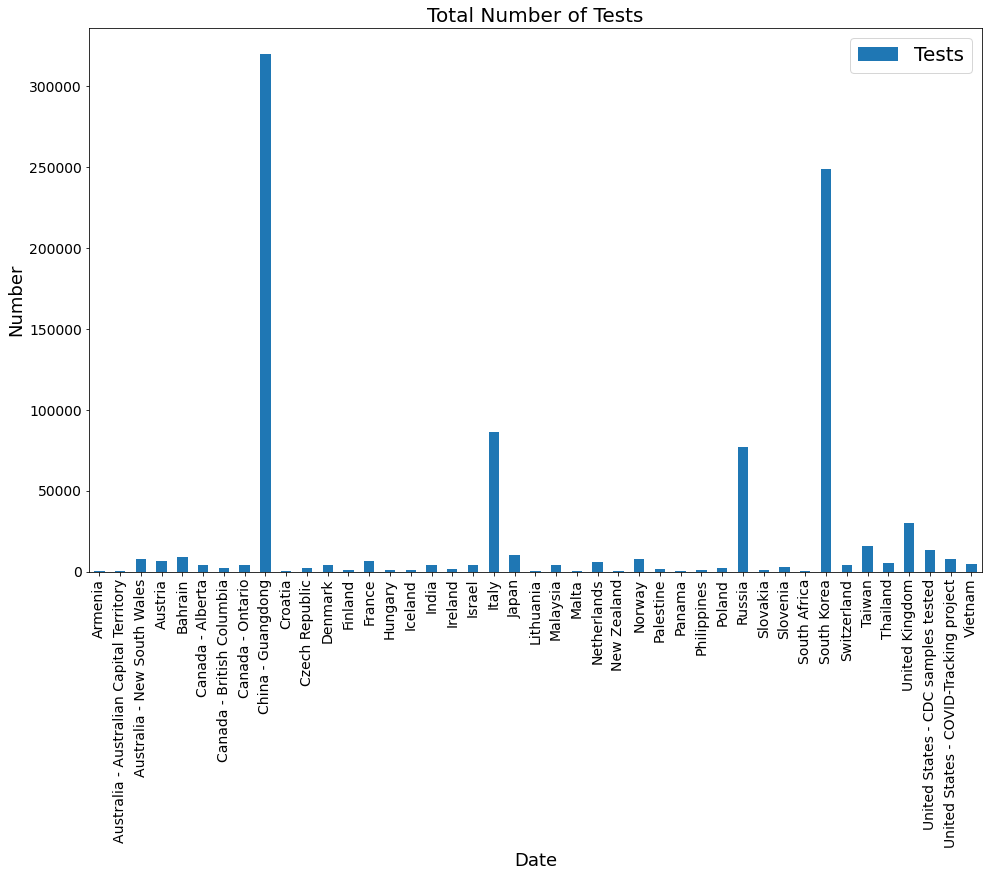

In [49]:
url_number_of_tests = 'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/COVID-19%20Tests/COVID-19%20Tests.csv'
tests_df = pd.read_csv(url_number_of_tests )
tests_df.columns = ['Country','Year','Tests']
tests_df.set_index("Country", inplace = True)
tests_df.drop('Year', axis = 1, inplace = True)
ax = tests_df.plot.bar()
#ax = tests_df.plot.scatter(x='Country', y='Tests', s=tests_df['Tests'] * 200);
ax.set_ylabel("Number", fontname="Arial", fontsize=18)
ax.set_xlabel("Date", fontname="Arial", fontsize=18)
ax.legend(loc=0, prop={'size': 20})
ax.set_title("Total Number of Tests", fontsize=20)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

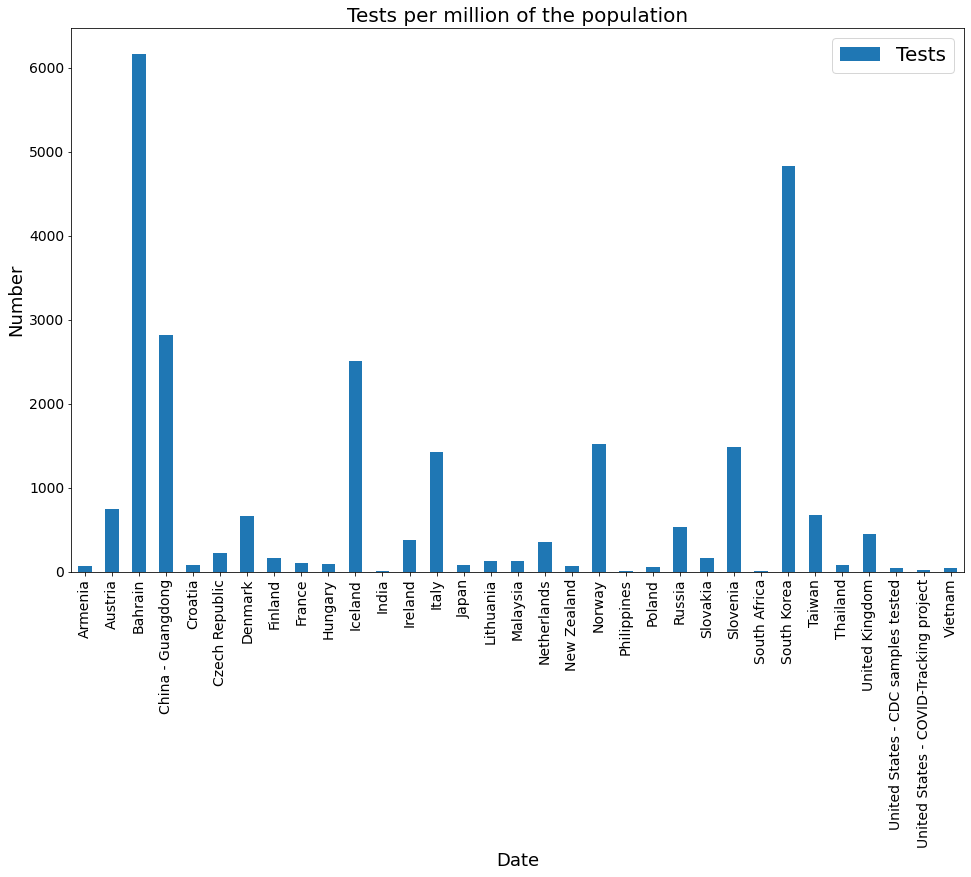

In [50]:
url_number_of_tests = 'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/COVID-19%20Tests%20per%20million%20people/COVID-19%20Tests%20per%20million%20people.csv'
tests_df = pd.read_csv(url_number_of_tests )
tests_df.columns = ['Country','Year','Tests']
tests_df.set_index("Country", inplace = True)
tests_df.drop('Year', axis = 1, inplace = True)
ax = tests_df.plot.bar()
#ax = tests_df.plot.scatter(x='Country', y='Tests', s=tests_df['Tests'] * 200);
ax.set_ylabel("Number", fontname="Arial", fontsize=18)
ax.set_xlabel("Date", fontname="Arial", fontsize=18)
ax.legend(loc=0, prop={'size': 20})
ax.set_title("Tests per million of the population", fontsize=20)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

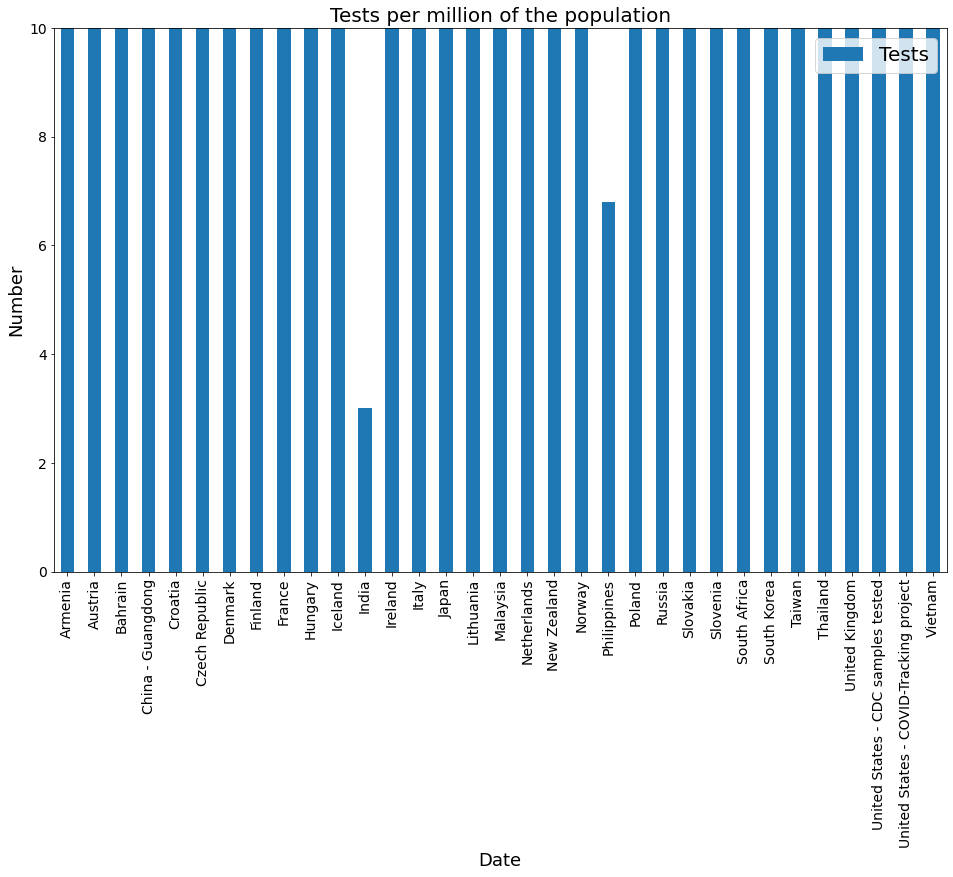

In [51]:
ax = tests_df.plot.bar()
#ax = tests_df.plot.scatter(x='Country', y='Tests', s=tests_df['Tests'] * 200);
ax.set_ylabel("Number", fontname="Arial", fontsize=18)
ax.set_xlabel("Date", fontname="Arial", fontsize=18)
ax.legend(loc=0, prop={'size': 20})
ax.set_ylim(0,10)
ax.set_title("Tests per million of the population", fontsize=20)
plt.xticks(rotation=90)

In [54]:
import plotly.offline as py
import plotly.express as px

Total_confirmed = df1['Confirmed'].sum()
Total_recovered = df1['Recovered'].sum()
Total_death = df1['Deaths'].sum()
data = [['Confirmed', Total_confirmed], ['Recovered', Total_recovered], ['Death', Total_death]] 
status = pd.DataFrame(data, columns = ['state', 'count']) 
fig = px.pie(status,
             values="count",
             names="state",
             title="State of Patient",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Predictions of Confirmation, Recovery and Deaths
Algorithms Used:

- Arima
- LSTM

# **Confirmation**

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

**ARIMA**

In [0]:
pred_cnfrm = df1.loc[:,["Last Update","Confirmed"]]

In [105]:
confirm_cs = pred_cnfrm.cumsum()
confirm_cs['date1'] = pred_cnfrm['Last Update']
confirm_cs = confirm_cs.drop('Last Update',axis=1)
arima_data = confirm_cs
arima_data.columns = ['count','confirmed_date']
arima_data.head()

count  confirmed_date
Country/Region Last Update                       
Afghanistan    2020-02-24     1.0             1.0
               2020-03-08     5.0             4.0
               2020-03-10    10.0             5.0
               2020-03-11    24.0            14.0
               2020-03-14    35.0            11.0

In [106]:
model = ARIMA(arima_data['count'].values, order=(1, 2, 1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                 6612
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -69941.925
Method:                       css-mle   S.D. of innovations           9496.615
Date:                Wed, 22 Apr 2020   AIC                         139891.850
Time:                        15:40:04   BIC                         139919.037
Sample:                             2   HQIC                        139901.245
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7562      1.056      0.716      0.474      -1.313       2.825
ar.L1.D2.y     0.9425      0.004    228.697      0.000       0.934       0.951
ma.L1.D2.y    -1.0000      0.000  -2213.279      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0610           +0.0000j            1.0610            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [107]:
forcast = fit_model.forecast(steps=7)
pred_y = forcast[0].tolist()
pred = pd.DataFrame(pred_y)
pred['pred']=  pred - pred.shift(1) 
pred

,0,pred
0,3.515347e+07,NaN
1,3.515436e+07,886.072347
2,3.515564e+07,1284.013575
3,3.515730e+07,1659.111759
4,3.515931e+07,2012.680656
5,3.516166e+07,2345.958467
6,3.516432e+07,2660.112178


In [0]:
dataset_c = pd.DataFrame(pred_cnfrm['Confirmed'])

In [0]:
data = np.array(dataset_c).reshape(-1, 1)
train_data = dataset_c[:len(dataset_c)-8]
test_data = dataset_c[len(dataset_c)-8:]

**LSTM**

In [110]:
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
n_input =5
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (n_input, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit(generator, epochs = 8)

Epoch 1/8
6601/6601 [==============================] - 58s 9ms/step - loss: 0.0012
Epoch 2/8
6601/6601 [==============================] - 56s 8ms/step - loss: 0.0010
Epoch 3/8
6601/6601 [==============================] - 56s 8ms/step - loss: 9.2202e-04
Epoch 4/8
6601/6601 [==============================] - 58s 9ms/step - loss: 8.8206e-04
Epoch 5/8
6601/6601 [==============================] - 56s 9ms/step - loss: 5.9561e-04
Epoch 6/8
6601/6601 [==============================] - 56s 8ms/step - loss: 7.8009e-04
Epoch 7/8
6601/6601 [==============================] - 56s 8ms/step - loss: 7.9954e-04
Epoch 8/8
6601/6601 [==============================] - 55s 8ms/step - loss: 7.7770e-04


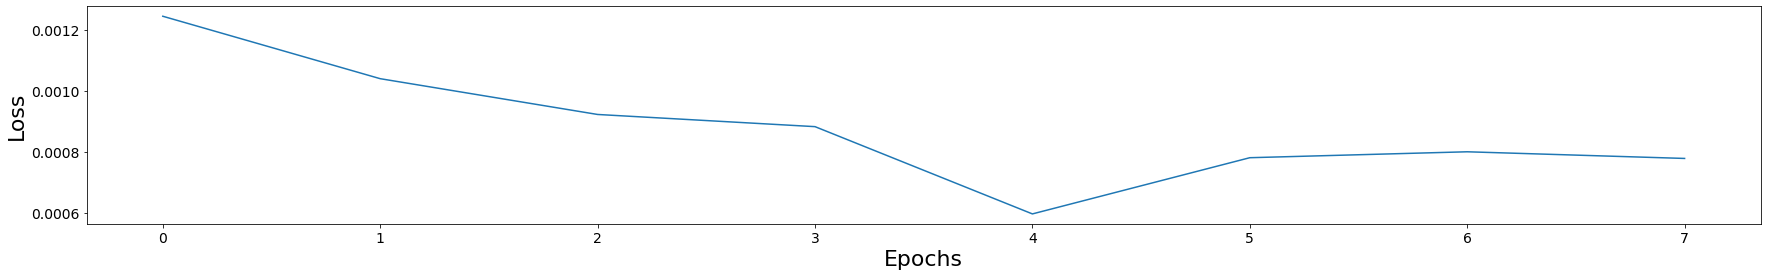

In [111]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (30,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,100,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [112]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))
prediction

,0
0,1951.270141
1,2754.026075
2,3650.605577
3,4554.711463
4,5518.268106
5,6579.163355
6,7614.136844
7,8689.634579


# Recovery

**ARIMA**

In [119]:
rec_cs = pred_rec.cumsum()
rec_cs['date1'] = pred_cnfrm['Last Update']
rec_cs = rec_cs.drop('Last Update',axis=1)
arima_data_r = rec_cs
arima_data_r.columns = ['count','confirmed_date']
arima_data_r = arima_data_r.head(28)
arima_data_r

count  confirmed_date
Country/Region Last Update                       
Afghanistan    2020-02-24     0.0             1.0
               2020-03-08     0.0             4.0
               2020-03-10     0.0             5.0
               2020-03-11     0.0            14.0
               2020-03-14     0.0            11.0
               2020-03-15     0.0            16.0
               2020-03-16     1.0            21.0
               2020-03-17     2.0            22.0
               2020-03-20     3.0            24.0
               2020-03-22     4.0            40.0
               2020-03-23     5.0            40.0
               2020-03-24     6.0            74.0
               2020-03-25     8.0            84.0
               2020-03-26    10.0            94.0
               2020-03-27    12.0           110.0
               2020-03-28    14.0           110.0
               2020-03-29    16.0           120.0
               2020-03-30    18.0           170.0
               2020-03-31    23.0           174.0
               2020-04-01    28.0           237.0
               2020-04-02    38.0           273.0
               2020-04-03    48.0           281.0
               2020-04-04    58.0           299.0
               2020-04-05    73.0           349.0
               2020-04-06    91.0           367.0
               2020-04-07   109.0           423.0
               2020-04-08   138.0           444.0
               2020-04-09   170.0           484.0

In [121]:
model = ARIMA(arima_data['count'].values, order=(1, 2, 1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                 6612
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -69941.925
Method:                       css-mle   S.D. of innovations           9496.615
Date:                Wed, 22 Apr 2020   AIC                         139891.850
Time:                        15:58:49   BIC                         139919.037
Sample:                             2   HQIC                        139901.245
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7562      1.056      0.716      0.474      -1.313       2.825
ar.L1.D2.y     0.9425      0.004    228.697      0.000       0.934       0.951
ma.L1.D2.y    -1.0000      0.000  -2213.279      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0610           +0.0000j            1.0610            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [122]:
forcast_r = fit_model.forecast(steps=7)
pred_y_r = forcast_r[0].tolist()
pred = pd.DataFrame(pred_y_r)
pred['pred']=  pred - pred.shift(1) 
pred

,0,pred
0,3.515347e+07,NaN
1,3.515436e+07,886.072347
2,3.515564e+07,1284.013575
3,3.515730e+07,1659.111759
4,3.515931e+07,2012.680656
5,3.516166e+07,2345.958467
6,3.516432e+07,2660.112178


In [0]:
dataset = pd.DataFrame(pred_rec['Recovered'])
data = np.array(dataset).reshape(-1, 1)
train_data = dataset[:len(dataset)-8]
test_data = dataset[len(dataset)-8:]

**LSTM**

In [124]:
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
n_input =5
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (n_input, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit(generator, epochs = 8)

Epoch 1/8
6601/6601 [==============================] - 58s 9ms/step - loss: 0.0038
Epoch 2/8
6601/6601 [==============================] - 57s 9ms/step - loss: 0.0024
Epoch 3/8
6601/6601 [==============================] - 60s 9ms/step - loss: 0.0021
Epoch 4/8
6601/6601 [==============================] - 59s 9ms/step - loss: 0.0018
Epoch 5/8
6601/6601 [==============================] - 60s 9ms/step - loss: 0.0015
Epoch 6/8
6601/6601 [==============================] - 59s 9ms/step - loss: 0.0014
Epoch 7/8
6601/6601 [==============================] - 60s 9ms/step - loss: 0.0013
Epoch 8/8
6601/6601 [==============================] - 61s 9ms/step - loss: 0.0013


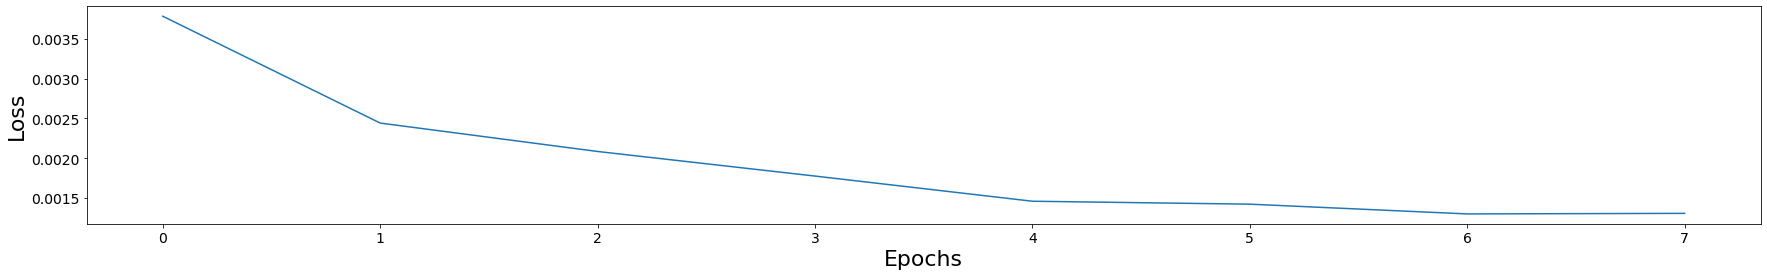

In [125]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (30,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,100,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [0]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [127]:
prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))
prediction

,0
0,-190.973071
1,-309.941720
2,-412.587751
3,-515.143424
4,-621.092789
5,-740.778413
6,-860.308565
7,-980.607182


# Deaths

**ARIMA**

In [0]:
pred_dth = df1.loc[:,["Last Update","Deaths"]]

In [136]:
dth_cs = pred_dth.cumsum()
dth_cs['date1'] = pred_cnfrm['Last Update']
dth_cs = dth_cs.drop('Last Update',axis=1)
arima_data_d = dth_cs
arima_data_d.columns = ['count','confirmed_date']
arima_data_d = arima_data_d.head(28)
arima_data_d

count  confirmed_date
Country/Region Last Update                       
Afghanistan    2020-02-24     0.0             1.0
               2020-03-08     0.0             4.0
               2020-03-10     0.0             5.0
               2020-03-11     0.0            14.0
               2020-03-14     0.0            11.0
               2020-03-15     0.0            16.0
               2020-03-16     0.0            21.0
               2020-03-17     0.0            22.0
               2020-03-20     0.0            24.0
               2020-03-22     1.0            40.0
               2020-03-23     2.0            40.0
               2020-03-24     3.0            74.0
               2020-03-25     5.0            84.0
               2020-03-26     9.0            94.0
               2020-03-27    13.0           110.0
               2020-03-28    17.0           110.0
               2020-03-29    21.0           120.0
               2020-03-30    25.0           170.0
               2020-03-31    29.0           174.0
               2020-04-01    33.0           237.0
               2020-04-02    39.0           273.0
               2020-04-03    45.0           281.0
               2020-04-04    52.0           299.0
               2020-04-05    59.0           349.0
               2020-04-06    70.0           367.0
               2020-04-07    84.0           423.0
               2020-04-08    98.0           444.0
               2020-04-09   113.0           484.0

In [137]:
model = ARIMA(arima_data_d['count'].values, order=(1, 2, 1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 -37.917
Method:                       css-mle   S.D. of innovations              1.033
Date:                Wed, 22 Apr 2020   AIC                             83.834
Time:                        16:10:58   BIC                             88.866
Sample:                             2   HQIC                            85.283
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5744      0.167      3.435      0.002       0.247       0.902
ar.L1.D2.y     0.9656      0.086     11.254      0.000       0.797       1.134
ma.L1.D2.y    -1.0000      0.065    -15.288      0.000      -1.128      -0.872
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0356           +0.0000j            1.0356            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [138]:
forcast_d = fit_model.forecast(steps=6)
pred_y_d = forcast_d[0].tolist()
pred = pd.DataFrame(pred_y_d)
pred['pred'] = pred - pred.shift(1)
pred

,0,pred
0,128.530799,NaN
1,144.593897,16.063098
2,161.190743,16.596846
3,178.322736,17.131993
4,195.991228,17.668492
5,214.197522,18.206294


In [0]:
dataset = pd.DataFrame(pred_dth['Deaths'])
data = np.array(dataset).reshape(-1, 1)
train_data = dataset[:len(dataset)-8]
test_data = dataset[len(dataset)-8:]

**LSTM**

In [140]:
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
n_input =5
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (n_input, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit(generator, epochs = 15)

Epoch 1/15
6601/6601 [==============================] - 61s 9ms/step - loss: 0.0017
Epoch 2/15
6601/6601 [==============================] - 58s 9ms/step - loss: 0.0013
Epoch 3/15
6601/6601 [==============================] - 58s 9ms/step - loss: 0.0012
Epoch 4/15
6601/6601 [==============================] - 58s 9ms/step - loss: 8.6599e-04
Epoch 5/15
6601/6601 [==============================] - 59s 9ms/step - loss: 8.3521e-04
Epoch 6/15
6601/6601 [==============================] - 59s 9ms/step - loss: 7.4514e-04
Epoch 7/15
6601/6601 [==============================] - 63s 10ms/step - loss: 7.1535e-04
Epoch 8/15
6601/6601 [==============================] - 60s 9ms/step - loss: 7.4747e-04
Epoch 9/15
6601/6601 [==============================] - 60s 9ms/step - loss: 7.0387e-04
Epoch 10/15
6601/6601 [==============================] - 58s 9ms/step - loss: 6.1454e-04
Epoch 11/15
6601/6601 [==============================] - 58s 9ms/step - loss: 5.8984e-04
Epoch 12/15
6601/6601 [==================

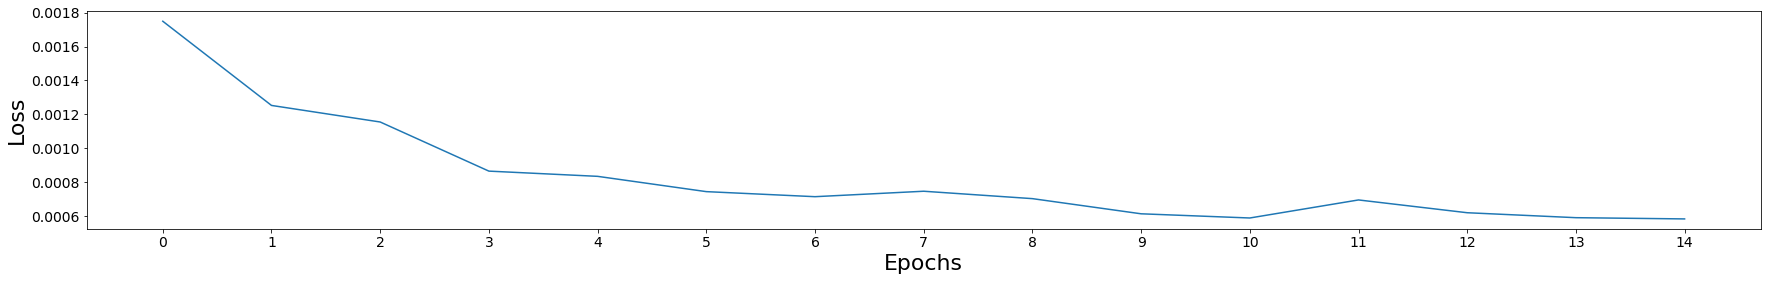

In [153]:
#Epochs vs Loss
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (30,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,100,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [154]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)
prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))
prediction

,0
0,32.307557
1,40.785618
2,45.538372
3,47.608410
4,48.099203
5,47.799761
6,47.572359
7,47.388917
